In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
path='https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/multiple_linear_data.csv'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25,30
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40,50
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70,75
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50,50


In [5]:
y=data['G3']
orig_cols = data.columns
orig_cols

Index(['age', 'address', 'famsize', 'reason', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [6]:
X=data.drop('G3',axis='columns')

In [7]:
X.head()

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50


In [8]:
column_transformer=make_column_transformer(
    (OneHotEncoder(),['address','famsize','reason','schoolsup','famsup','paid','activities','higher','internet','romantic']),
    remainder='passthrough')

In [9]:
column_transformer.fit_transform(X)

array([[ 0.,  1.,  1., ...,  6., 25., 30.],
       [ 0.,  1.,  1., ...,  4., 25., 25.],
       [ 0.,  1.,  0., ..., 10., 35., 40.],
       ...,
       [ 1.,  0.,  1., ...,  3., 50., 40.],
       [ 1.,  0.,  0., ...,  0., 55., 60.],
       [ 0.,  1.,  0., ...,  5., 40., 45.]])

In [10]:
from sklearn.pipeline import make_pipeline

In [11]:
linearreg=LinearRegression()

In [12]:
pipe=make_pipeline(column_transformer,linearreg)

In [13]:
pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['address', 'famsize',
                                                   'reason', 'schoolsup',
                                                   'famsup', 'paid',
                                               

In [14]:
X_new=X.sample(10,random_state=99)

In [15]:
X_new

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2
276,18,R,GT3,home,2,0,no,no,no,no,no,yes,yes,1,1,5,75,50,45
50,16,U,LE3,course,2,0,no,yes,yes,no,yes,yes,no,3,3,4,2,60,65
126,15,U,LE3,home,2,0,yes,no,no,yes,yes,yes,yes,3,2,1,0,35,50
7,17,U,GT3,home,2,0,yes,yes,no,no,yes,no,no,1,4,1,6,30,25
61,16,U,GT3,course,1,0,yes,yes,no,yes,yes,yes,yes,5,5,5,6,50,40
81,15,U,GT3,home,3,0,yes,no,yes,no,yes,yes,no,3,2,5,4,55,50
260,18,U,GT3,home,2,0,no,yes,yes,no,yes,yes,yes,1,2,2,21,85,90
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70
245,16,U,GT3,course,1,0,no,no,no,no,yes,yes,no,3,3,4,6,90,90
194,16,U,GT3,home,1,0,no,no,no,no,yes,yes,no,3,3,3,0,65,70


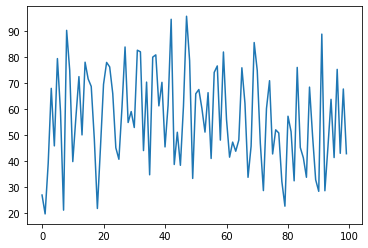

In [16]:
plt.plot(pipe.predict(X[:100]))

In [17]:
mean_squared_error(y,pipe.predict(X))

85.27642516663592

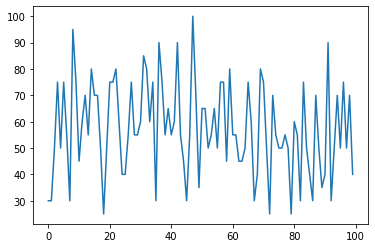

In [18]:
plt.plot(y[:100])